# Crow-AMSAA Method for Fleet Failure Forecasting

Resource: https://www.hbkworld.com/en/knowledge/resource-center/articles/the-change-of-slope-methodology-in-reliability-growth-analysis

In [20]:
from numpy import log as ln
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_rows=1000

In [2]:
df = pd.read_csv("../data/crow-amsaa_failures.csv")

In [3]:
df.head()

,Failure Date,Cumulative Time In Days,Failure Number
0,05/02/03,4,1
1,05/08/03,10,2
2,05/16/03,18,3
3,05/27/03,29,4
4,06/04/03,37,5


In [4]:
df.tail()

,Failure Date,Cumulative Time In Days,Failure Number
19,10/25/03,180,20
20,11/05/03,191,21
21,11/20/03,206,22
22,12/04/03,220,23
23,12/20/03,236,24


#### Let's plot the failures in Log-Log Scale

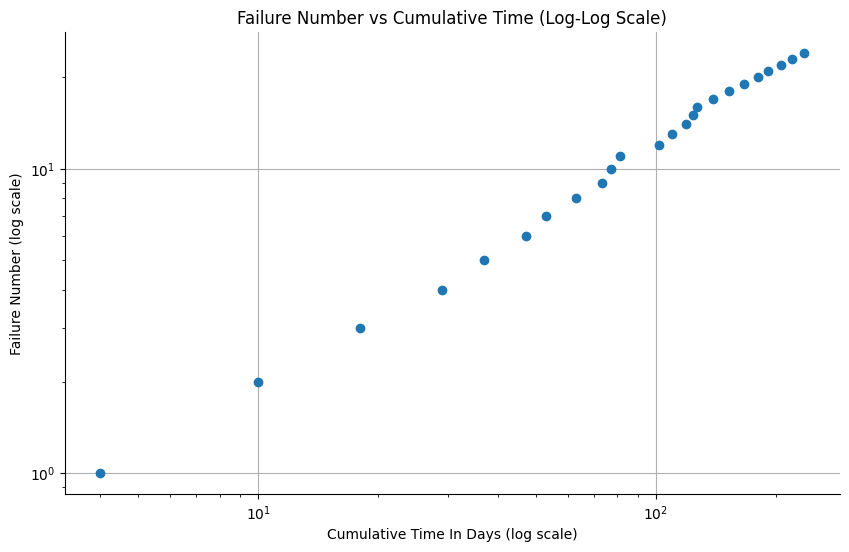

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.spines[['right', 'top']].set_visible(False)

plt.plot(df['Cumulative Time In Days'], df['Failure Number'], marker='o', linestyle='')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.title('Failure Number vs Cumulative Time (Log-Log Scale)')
# Alternatively, we can do plt.loglog(), but the above is more explicit, which I prefer
# plt.loglog(df['Cumulative Time In Days'], df['Failure Number'], marker='o', linestyle='')cale)')
plt.xlabel('Cumulative Time In Days (log scale)')
plt.ylabel('Failure Number (log scale)')
plt.grid(True)
plt.show()

## Applying Crow-AMSAA Method using Linear Regression

Function for cumulative number of failures:

$n(t)=\lambda t^\beta$

To convert this equation above into a linear form, we simply apply the log on both sides of the equation:

$\log n(t)=\log \lambda+\beta \log t$

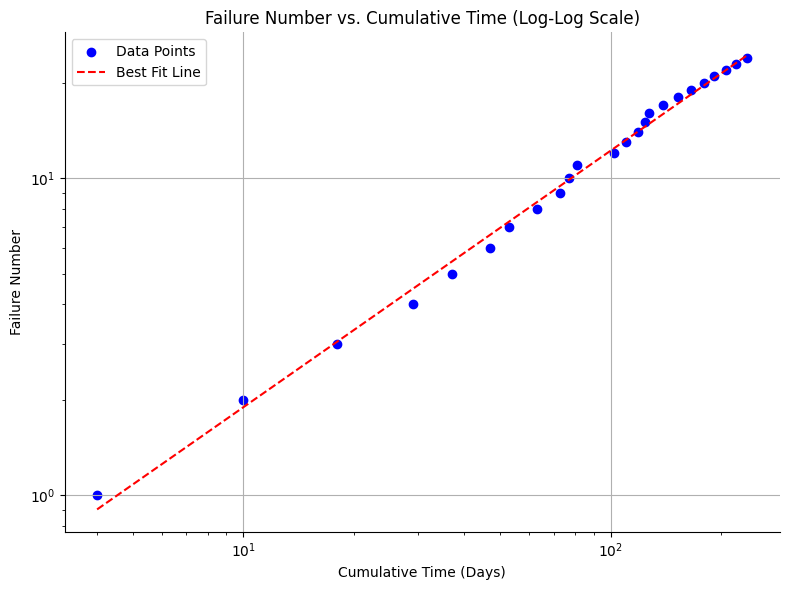

Fitted Line Equation: y = 0.29 * x^0.81
Slope: 0.8095
Intercept: 0.2935
R-squared: 0.9955


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Read the CSV file into a DataFrame
data = pd.read_csv("../data/crow-amsaa_failures.csv")

# Extract the data
cumulative_time = data['Cumulative Time In Days']
failure_number = data['Failure Number']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(np.log(cumulative_time), np.log(failure_number))

# Create a log-log scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.scatter(cumulative_time, failure_number, marker='o', color='b', label='Data Points')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale

# Plot the best-fit line
x_fit = np.linspace(min(cumulative_time), max(cumulative_time), 100)
y_fit = np.exp(intercept) * (x_fit**slope)
plt.plot(x_fit, y_fit, color='r', linestyle='--', label='Best Fit Line')

plt.title('Failure Number vs. Cumulative Time (Log-Log Scale)')
plt.xlabel('Cumulative Time (Days)')
plt.ylabel('Failure Number')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

# Print the fitted line equation, slope and intercept of the best-fit line
print(f"Fitted Line Equation: y = {np.exp(intercept):.2f} * x^{slope:.2f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {np.exp(intercept):.4f}")
print(f"R-squared: {r_value**2:.4f}")